In [1]:
class predictor(object):

    def __init__(self,modelpath,categorypath):
        
        import numpy as np
        import os
        import six.moves.urllib as urllib
        import sys
        import tarfile
        import tensorflow as tf
        import zipfile
        import collections
        import numpy as np
        
        import PIL.ImageColor as ImageColor
        import PIL.ImageDraw as ImageDraw
        import PIL.ImageFont as ImageFont
        import six
        import tensorflow as tf
        from collections import defaultdict
        from io import StringIO
        from matplotlib import pyplot as plt
        from PIL import Image
        
        self.modelpath = modelpath
#         self.labelpath = labelpath
        self.categorypath = categorypath
        detection_graph = tf.Graph()
        with detection_graph.as_default():
            od_graph_def = tf.GraphDef()
            with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
                serialized_graph = fid.read()
                od_graph_def.ParseFromString(serialized_graph)
                tf.import_graph_def(od_graph_def, name='')
        self.graph = detection_graph
        
        
        self.image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        self.boxes_tensor = detection_graph.get_tensor_by_name('detection_boxes:0')
        self.scores_tensor = detection_graph.get_tensor_by_name('detection_scores:0')
        self.classes_tensor = detection_graph.get_tensor_by_name('detection_classes:0')
        self.tf = tf
        import pickle
        f = open(categorypath,'rb')
        self.categories = pickle.loads(f.read())
        f.close()
        
        
    def load_image_into_numpy_array(self,image):
        import numpy as np
        (im_width, im_height) = image.size
        return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
    def predict(self,image_path):
        import PIL.Image as Image
        import numpy as np
        import collections
        with self.graph.as_default():
            with self.tf.Session(graph=self.graph) as sess:
                image = Image.open(image_path)
                image_np = self.load_image_into_numpy_array(image)
                image_np_expanded = np.expand_dims(image_np, axis=0)
                (boxes, scores, classes) = sess.run(
                    [self.boxes_tensor, self.scores_tensor, self.classes_tensor],feed_dict={self.image_tensor: image_np_expanded})
                box = tuple(boxes[0].tolist())
#                 print(box)
                ymin, xmin, ymax, xmax = box[0]
                im_width, im_height = image.size
                (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
                left = int(left) -15
                right = int(right) +15
                top = int(top) +20
                bottom = int(bottom) -20
                img = image.crop((left,top,right,bottom))
                counted = collections.Counter(classes.tolist()[0])
                indx=int(counted.most_common()[0][0])
                pred = (self.categories[indx-1]['name'])
                pred_score = (scores[0][0])
                return (img,pred,pred_score)

In [2]:
PATH_TO_CKPT = '/home/evotianus/CarND-Capstone/training/v3.pb'
PATH_TO_LABELS = "/home/evotianus/CarND-Capstone/training/labelmap_an.pbtxt"

In [3]:
p = predictor(modelpath=PATH_TO_CKPT,categorypath='./categories.pickle')

In [4]:
from glob import glob
from random import shuffle

In [5]:
TEST_IMAGE_PATHS = glob('/home/evotianus/CarND-Capstone/images/*.png')
shuffle(TEST_IMAGE_PATHS)

In [6]:
img,pred,preds = p.predict(TEST_IMAGE_PATHS[5])

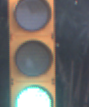

In [7]:
img

In [8]:
pred

'Green'

In [9]:
preds

0.37887913